In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/palmer-archipelago-antarctica-penguin-data/penguins_size.csv
/kaggle/input/palmer-archipelago-antarctica-penguin-data/penguins_lter.csv


In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [44]:
path=r"/kaggle/input/palmer-archipelago-antarctica-penguin-data/penguins_size.csv"

df=pd.read_csv(path)

In [45]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [47]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


# EDA

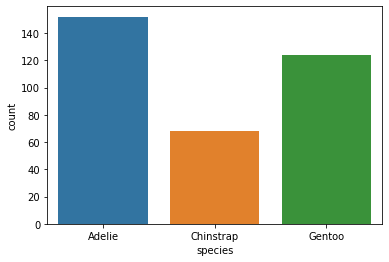

In [48]:
sns.countplot(x=df['species'])

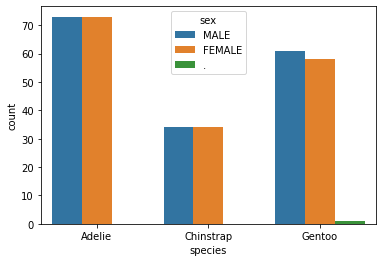

In [49]:
sns.countplot(x=df['species'],hue=df['sex'])

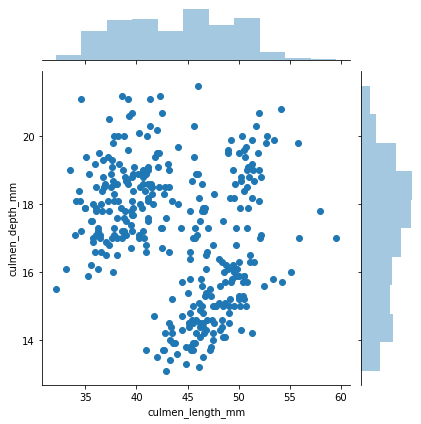

In [50]:
sns.jointplot(x='culmen_length_mm', y='culmen_depth_mm',data=df)

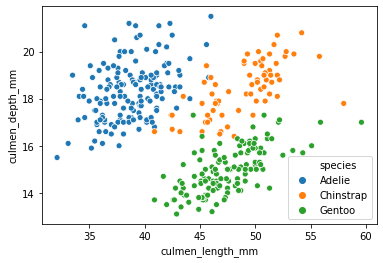

In [51]:
sns.scatterplot(x='culmen_length_mm', y='culmen_depth_mm',data=df,hue='species')

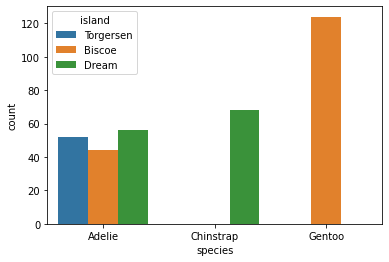

In [52]:
sns.countplot(x=df['species'],hue=df['island'])

# Converting categorical data

In [53]:
df=pd.get_dummies(df,columns=['sex','island'],drop_first=True)

In [54]:
df.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE,island_Dream,island_Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,0,1,0,1
1,Adelie,39.5,17.4,186.0,3800.0,1,0,0,1
2,Adelie,40.3,18.0,195.0,3250.0,1,0,0,1
3,Adelie,NaN,NaN,NaN,NaN,0,0,0,1
4,Adelie,36.7,19.3,193.0,3450.0,1,0,0,1


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   culmen_length_mm   342 non-null    float64
 2   culmen_depth_mm    342 non-null    float64
 3   flipper_length_mm  342 non-null    float64
 4   body_mass_g        342 non-null    float64
 5   sex_FEMALE         344 non-null    uint8  
 6   sex_MALE           344 non-null    uint8  
 7   island_Dream       344 non-null    uint8  
 8   island_Torgersen   344 non-null    uint8  
dtypes: float64(4), object(1), uint8(4)
memory usage: 14.9+ KB


# Checking for missing values

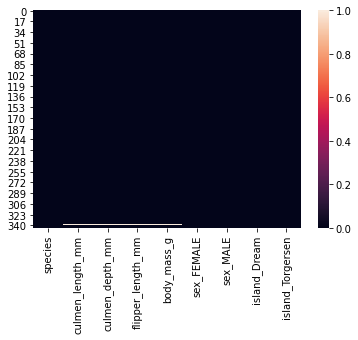

In [56]:
sns.heatmap(df.isnull())

In [57]:
df=df.fillna(0)

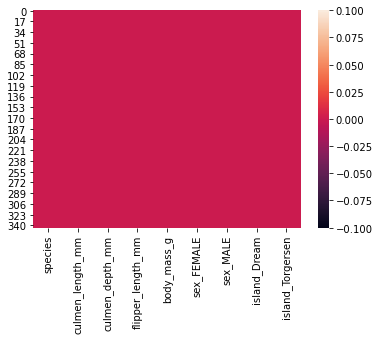

In [58]:
sns.heatmap(df.isnull())

# Standardizing Data

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scale=StandardScaler()
scale.fit(df.drop(['species'],axis=1))
transformed=scale.transform(df.drop(['species'],axis=1))
df_scaled=pd.DataFrame(transformed,columns=df.columns[1:])


In [61]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   344 non-null    float64
 1   culmen_depth_mm    344 non-null    float64
 2   flipper_length_mm  344 non-null    float64
 3   body_mass_g        344 non-null    float64
 4   sex_FEMALE         344 non-null    float64
 5   sex_MALE           344 non-null    float64
 6   island_Dream       344 non-null    float64
 7   island_Torgersen   344 non-null    float64
dtypes: float64(8)
memory usage: 21.6 KB


# Lets Build Our Model

In [62]:
X=df_scaled
y=df['species']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=101)

In [63]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train,y_train)
out1=knn.predict(x_test)

In [64]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,out1))
print(confusion_matrix(y_test,out1))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        44
   Chinstrap       1.00      1.00      1.00        28
      Gentoo       1.00      1.00      1.00        42

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

[[44  0  0]
 [ 0 28  0]
 [ 0  0 42]]


WOW we got it right at first attempt only

Lets see the pattern of error rate for some values of n_neighbors

In [66]:
error_rate=[]

for i in range(1,20):
    knn_i=KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(x_train,y_train)
    out_i=knn_i.predict(x_test)
    error_rate.append(np.mean(out_i!=y_test))

Text(0.5, 1.0, 'Best KNeighbors')

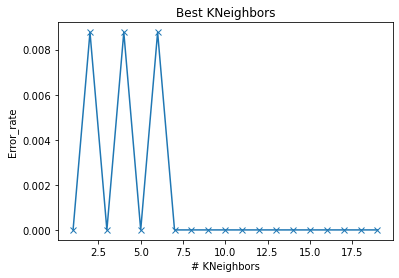

In [67]:
plt.plot(range(1,20),error_rate,marker='x',markerfacecolor='red')
plt.xlabel('# KNeighbors')
plt.ylabel('Error_rate')
plt.title('Best KNeighbors')

Hence this graph depicts that error_rate is "ZERO" for values like 1,3,5,7 and then is zero for values after 7
So the value of K neighbors in our model could be any odd number till 7 and any number after that giving 100% efficienct model

# Hence our model predicts output with 100% efficiency